In [2]:
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras import layers, utils
from tensorflow import nn

## Sequential model

In [5]:
# Creating a sequential model

seq_model = Sequential()
seq_model.add(layers.Dense(4, input_shape=(10,2)))
seq_model.add(layers.Dense(4))
seq_model.add(layers.Dense(1))
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10, 4)             12        
_________________________________________________________________
dense_4 (Dense)              (None, 10, 4)             20        
_________________________________________________________________
dense_5 (Dense)              (None, 10, 1)             5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


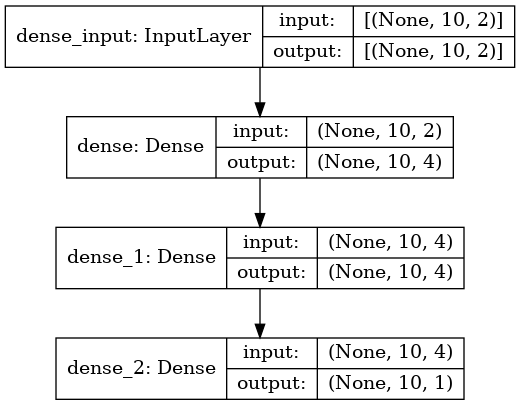

In [4]:
utils.plot_model(seq_model, show_shapes=True)

## Functional model

In [6]:
# Creating a functional model

input1 = Input(shape=(10,2))
lay1 = layers.Dense(4, input_shape=(10,2))(input1)
lay2 = layers.Dense(4)(lay1)
out1 = layers.Dense(1)(lay2)
out2 = layers.Dense(1)(lay2)
func_model = Model(inputs=input1, outputs=[out1, out2])
func_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10, 2)]      0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 10, 4)        12          input_1[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 10, 4)        20          dense_6[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 10, 1)        5           dense_7[0][0]                    
______________________________________________________________________________________________

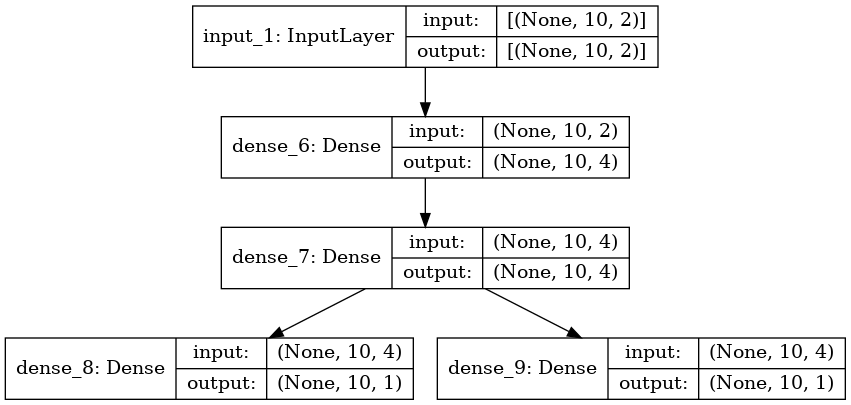

In [7]:
utils.plot_model(func_model, show_shapes=True)

## Subclassing

In [15]:
class MyModel(Model):
    
    def __init__(self):
        
        super(MyModel, self).__init__()
        self.dense1 = layers.Dense(4, activation=nn.relu)
        self.dense2 = layers.Dense(4, activation=nn.softmax)
        self.dense1 = layers.Dropout(0.5)
        
    def call(self, inputs, training=False):
        
        x = self.dense1(inputs)
        if training:
            x = self.dropout(x, training=training)
            return self.dense2
        
model = MyModel()

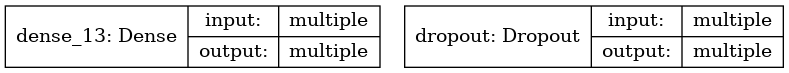

In [16]:
utils.plot_model(model, show_shapes=True)

In [4]:
class WideAndDeepModel(Model):
	
    def __init__(self, units=30, activation="relu", **kwargs):
    	
        super().__init__(**kwargs) # handles standard aruments ( name, etc.)
        self.hidden1 = layers.Dense(units, activation=activation)
        self.hidden2 = layers.Dense(units, activation=activation)
        self.main_output = layers.Dense(1)
        self.aux_output = layers.Dense(1)
       
    def call(self, inputs):
        
        input_A, input_B = inputs
        hidden1 = self.hidden1(inputs_B)
        hidden2 = self.hidden2(hidden1)
        concat = layers.Concatenate([input_A, hidden2])
        main_ouput = self.main_ouput(concat)
        aux_ouput = self.aux_ouput(hidden2)
        return main_ouput, aux_output
        
model = WideAndDeepModel()

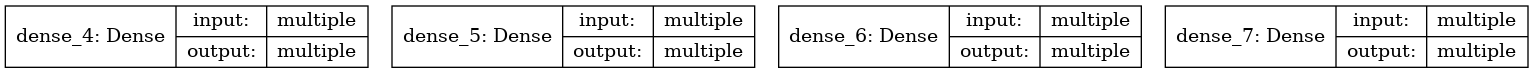

In [5]:
utils.plot_model(model, show_shapes=True)